<a href="https://colab.research.google.com/github/lk480/IIB_Project/blob/main/morph_ops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#This notebook contains re-implementation of MATLAB BWMORPH operations in Python
import numpy as np
import cv2
import scipy
import matplotlib.pyplot as plt
import tensorflow as tf

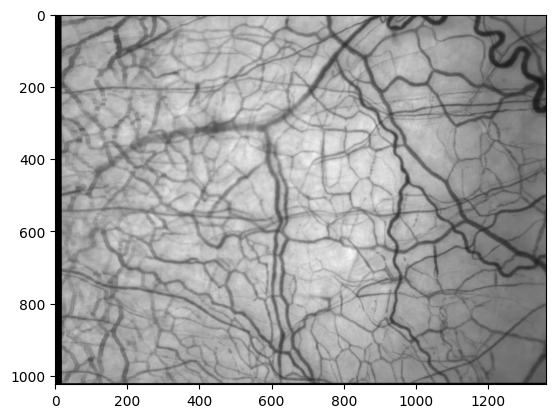

In [69]:
#Visualise the MII Image
mii_image_path = '/content/drive/MyDrive/PartIIB_HVI_Project/python_registration/ECC_out/willeye_euclidean/MII_start_0_end_9.pgm'
mii_image = cv2.imread(mii_image_path)
mii_image = (mii_image).astype(np.uint8)
plt.imshow(mii_image, cmap='gray')

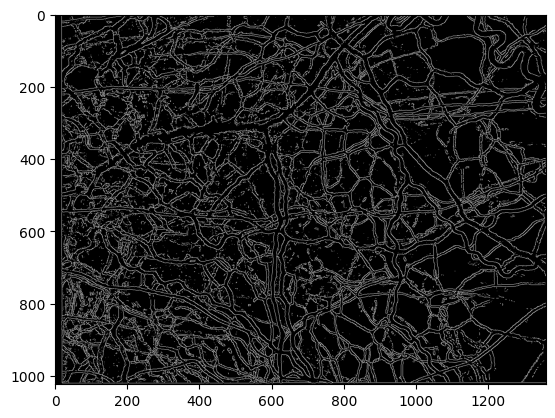

In [70]:
#Visualise the Canny Edge Detection
canny_edge_path = '/content/drive/MyDrive/PartIIB_HVI_Project/python_registration/ECC_out/willeye_euclidean/MII_start_0_end_9_CannyEdge.pgm'
canny_edge = cv2.imread(canny_edge_path)
plt.imshow(canny_edge)
if len(canny_edge.shape) > 2:
    canny_edge = cv2.cvtColor(canny_edge, cv2.COLOR_BGR2GRAY)
# Ensure that canny_edge is of type CV_8UC1
canny_edge = cv2.convertScaleAbs(canny_edge)
clahe = cv2.createCLAHE(clipLimit=6.0, tileGridSize=(6, 6))
edge_mii = clahe.apply(canny_edge)
#plt.imshow(edge_mii)

True

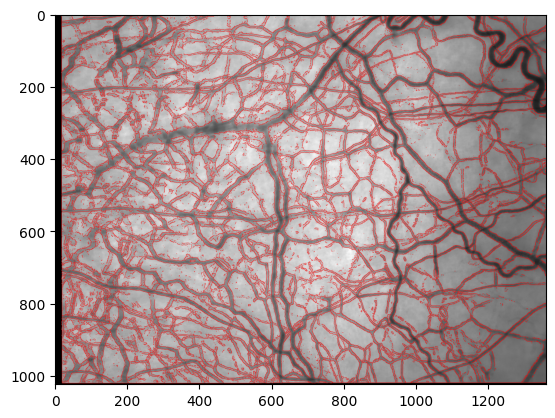

In [80]:
import cv2
import numpy as np
import cv2
import numpy as np

# Assuming edges is your canny edge map and mii_image is your original image

# Convert mii_image to color if it's grayscale
if len(mii_image.shape) == 2 or mii_image.shape[2] == 1:
    mii_image = cv2.cvtColor(mii_image, cv2.COLOR_GRAY2BGR)

# Create an overlay image
overlay = mii_image.copy()

# Set the color of the edges in the overlay image (making edges red here)
overlay[canny_edge != 0] = [255, 0, 0]  # Change [0, 0, 255] to any BGR color value you prefer for the edges

# Blend the overlay with the original image for a semi-transparent look
alpha = 1  # Adjust alpha for transparency (0 = fully transparent, 1 = fully opaque)
cv2.addWeighted(overlay, alpha, mii_image, 1 - alpha, 0, mii_image)

# Display the result
plt.imshow(mii_image)
cv2.imwrite('/content/drive/MyDrive/PartIIB_HVI_Project/python_registration/ECC_out/willeye_euclidean/mii_edge.png', mii_image)

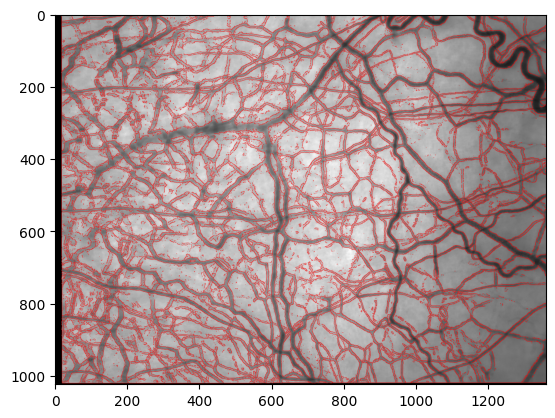

In [81]:
#Visualise the original segmentation
hvi_image_path = '/content/drive/MyDrive/PartIIB_HVI_Project/python_registration/ECC_out/willeye_euclidean/mii_edge.png'
hvi_segmentation = cv2.imread(hvi_image_path)
plt.imshow(hvi_segmentation)

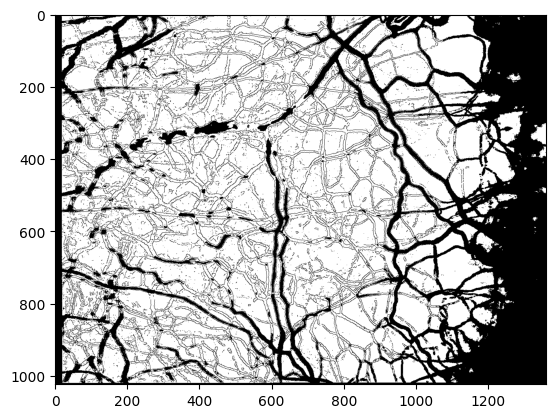

In [82]:
#Convert the image to binary
bw = cv2.imread(hvi_image_path ,cv2.IMREAD_GRAYSCALE)
_, bw = cv2.threshold(bw, 127, 255, cv2.THRESH_BINARY)
bw_safe = bw.copy()
plt.imshow(bw, cmap='gray')

<ipython-input-83-ed96e68a0b5e>:1: DeprecationWarning: Please use `distance_transform_edt` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import distance_transform_edt


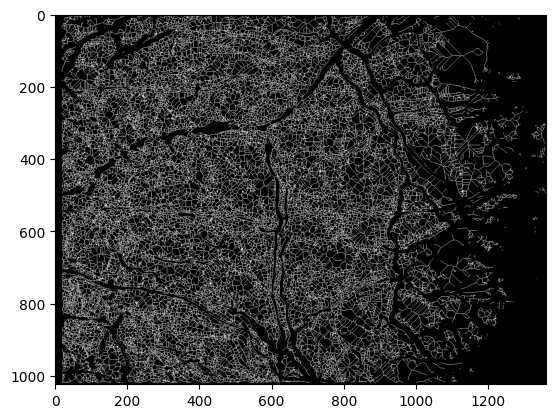

In [83]:
from scipy.ndimage.morphology import distance_transform_edt
#Skeletonise Image
from skimage.morphology import skeletonize
bw_central_skel = skeletonize(bw / 255).astype(np.uint8)
plt.imshow(bw_central_skel, cmap='gray')


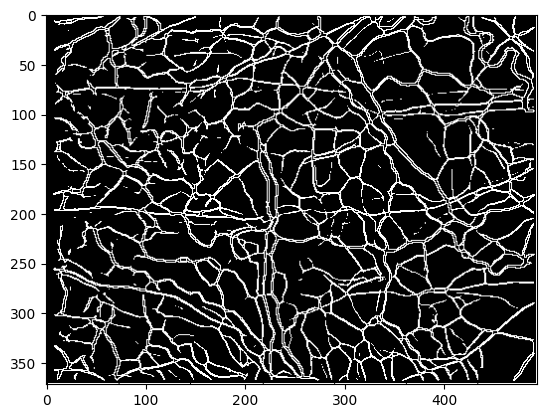

In [ ]:
import cv2
import numpy as np

binary_img = bw

# Define a kernel for erosion (you can adjust the size as needed)
kernel = np.ones((3,3),np.uint8)

# Erode the image
eroded_img = cv2.erode(binary_img, kernel, iterations=1)

# Subtract eroded image from the original binary image to get the boundaries
boundary_img = binary_img - eroded_img

# Save or display the boundary image
plt.imshow(boundary_img, cmap='gray')
